In [1]:
import pandas as pd
import numpy as np

# Data Wrangling Imports
from datetime import datetime

# Data Analysis Imports
import statistics
import seaborn as sns
from scipy import linalg
from matplotlib import style
from matplotlib import ticker
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Data Visualization Imports
#import cufflinks as cf
#import chart_studio.plotly as py
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.gridspec import GridSpec

# Econometry Imports
import pandas_ta as ta

# Other Imports
import os
from itertools import product
import warnings
import talib
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.10f}".format

### 2- Depois de cadastrar uma conta na [Binance](https://www.binance.com/pt-BR) é necessário inserir os parâmetros key e secret da API

In [2]:
from binance.client import Client
%run chaves02.ipynb
client = Client(key,secret)

In [3]:
# Escolhe o par
TRADING_PAIR = 'BTCBRL'
# Data de Inicio da Captura dos Dados
STARTING_DATE = "5 Mar, 2021"
# Data Final da Captura dos Dados
END_DATE = "12 Mar, 2021"

In [4]:
def process_message(msg):
    if msg['e'] == 'error':
        bm.stop_socket(conn_key)
        bm.close()
    else:
        pass

In [5]:
time_res = client.get_server_time()
time_res

{'serverTime': 1618874862358}

### 3- Obtenção de informações via API da Binance e construção do dataframe __data__

### [Binance Websockets API](https://python-binance.readthedocs.io/en/latest/websockets.html)

In [6]:
# Importing Binance Websockets API
from binance.client import *
from binance.websockets import BinanceSocketManager
from twisted.internet import reactor

# Initialize Binance Socket Manager
bm = BinanceSocketManager(client, user_timeout=60)
list_messages = []
conn_key = bm.start_trade_socket(TRADING_PAIR, process_message)
bm.start


<bound method Thread.start of <BinanceSocketManager(Thread-6, initial)>>

In [7]:
candles = client.get_klines(symbol=TRADING_PAIR, interval=Client.KLINE_INTERVAL_1MINUTE)

In [8]:
# Old Get klines from Binance Python API
#klines = client.get_historical_klines("ONEBNB", Client.KLINE_INTERVAL_1MINUTE, STARTING_DATE, END_DATE)

In [9]:
indexes = ['Open Time', 'Open', 'High','Low', 'Close', 'Volume', 'Close Time', 'QAV', 'No. Trades', 'Taker BBAV', 'Taker BQAV', 'Ignore']
data = pd.DataFrame(columns=indexes,data=candles)

In [10]:
len(data)

500

In [11]:
data.to_csv("CryptoBot_202103006Mv001.csv", index = False)

In [12]:
data = pd.read_csv("CryptoBot_202103006Mv001.csv")

In [13]:
data.dtypes
data['Open Time'] = data['Open Time'].apply(lambda x: datetime.fromtimestamp(int(x)/1000))
data.set_index(['Open Time'], inplace=True)
# data['Open'] = data['Open'].astype(float)
# data['High'] = data['High'].astype(float)
# data['Low'] = data['Low'].astype(float)
data['Close'] = data['Close'].astype(float)
data['Volume'] = data['Volume'].astype(float)
# data['QAV'] = data['QAV'].astype(float)
# data['Taker BBAV'] = data['Taker BBAV'].astype(float)
# data['Taker BQAV'] = data['Taker BQAV'].astype(float)

In [14]:
data

,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Ignore
Open Time,,,,,,,,,,,
2021-04-19 12:08:00,312842.0000000000,313021.0000000000,312500.0000000000,312798.0000000000,0.7602650000,1618844939999,237738.3847840000,98,0.1930040000,60357.6697770000,0
2021-04-19 12:09:00,312854.0000000000,313838.0000000000,312624.0000000000,313634.0000000000,0.1611440000,1618844999999,50434.0623000000,85,0.0699630000,21900.8260680000,0
2021-04-19 12:10:00,313636.0000000000,314290.0000000000,313492.0000000000,314225.0000000000,0.1974000000,1618845059999,61981.8976770000,89,0.1373020000,43123.0899830000,0
2021-04-19 12:11:00,314225.0000000000,314350.0000000000,313780.0000000000,313894.0000000000,0.5125030000,1618845119999,160958.2224490000,79,0.0948970000,29815.1559150000,0
2021-04-19 12:12:00,313811.0000000000,314850.0000000000,313691.0000000000,314673.0000000000,0.3028250000,1618845179999,95160.9782140000,116,0.1327180000,41677.1158920000,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19 20:23:00,315679.0000000000,315815.0000000000,315505.0000000000,315703.0000000000,0.1556210000,1618874639999,49126.1677870000,45,0.0090260000,2849.8654770000,0
2021-04-19 20:24:00,315814.0000000000,315962.0000000000,315601.0000000000,315774.0000000000,0.0623040000,1618874699999,19671.0891790000,51,0.0199960000,6315.5065090000,0
2021-04-19 20:25:00,315665.0000000000,315897.0000000000,315499.0000000000,315499.0000000000,0.0975650000,1618874759999,30795.9217970000,29,0.0192520000,6078.5911100000,0


### 4- Gráficos da informação obtida pela API da Binance e armazenada em __data__

#### [Introduction to Econometrics - G. S. Madalla](https://www.amazon.com.br/Introduction-Econometrics-G-S-Maddala/dp/0471497282) 

### Análise das informações obitidas pela API da Binance e armazenadas no dataframe __data__

#### 4.1. Gráficos com legenda automática do dataframe __data__

#### 4.1.1. Gráficos 'Open', 'High', 'Low', 'Close'

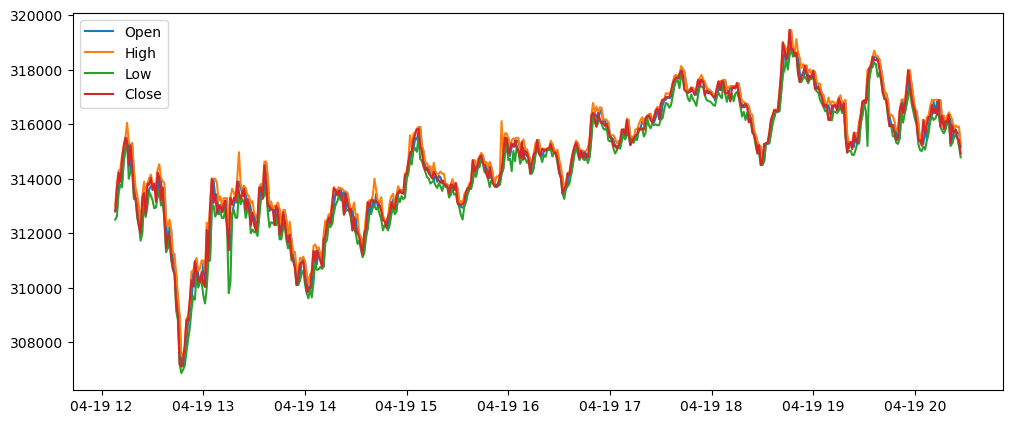

In [15]:
from matplotlib.pyplot import legend
from matplotlib import pylab
data_0 = data[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)
plt.legend(line, data_0.columns)

In [16]:
close = np.array(data['Close'])
high = np.array(data['High'])
low = np.array(data['Low'])

##### 5.1.1. BBANDS - Bollinger Bands
Learn more about the Bollinger Bands at tadoc.org.

In [19]:
data['Close'] = data['Close']*10**10

In [20]:
np.array(data['Close'].tail())

array([3.32210e+15, 3.31730e+15, 3.32221e+15, 3.32227e+15, 3.31905e+15])

In [21]:
upperband, middleband, lowerband = talib.BBANDS(np.array(data['Close']), timeperiod=21, nbdevup=1.7, nbdevdn=1.7, matype=0)

In [22]:
middleband[30:40]

array([3.39160857e+15, 3.39201333e+15, 3.39241667e+15, 3.39272714e+15,
       3.39303810e+15, 3.39310524e+15, 3.39319238e+15, 3.39300381e+15,
       3.39270762e+15, 3.39240095e+15])

In [23]:
upperband[30:40]

array([3.39806928e+15, 3.39798654e+15, 3.39777689e+15, 3.39767260e+15,
       3.39746834e+15, 3.39725428e+15, 3.39720354e+15, 3.39696274e+15,
       3.39677442e+15, 3.39653568e+15])

In [24]:
upperband[0]

nan

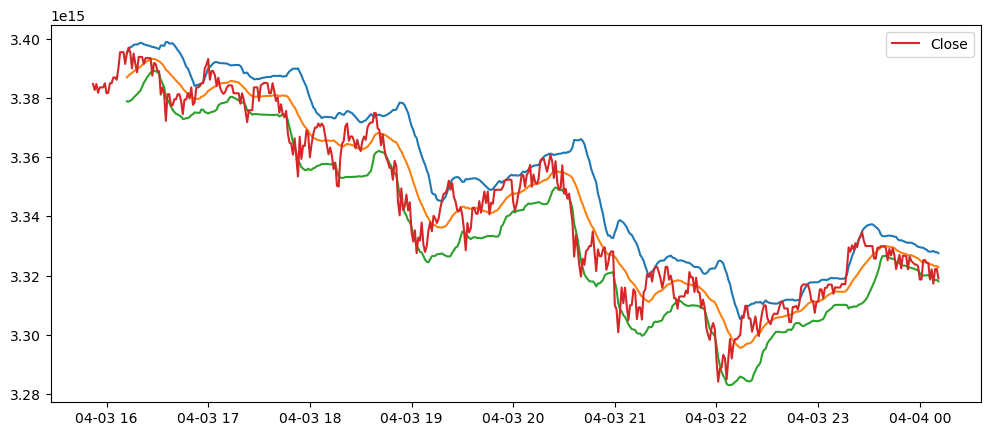

In [25]:
#Bordas de Boillinger
data_Boillinger = pd.DataFrame({"Upperband": upperband, "Middleband":middleband, "Lowerband":lowerband})

data_0 = data_Boillinger[["Upperband", "Middleband", "Lowerband"]]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)


#Preço
data_p = pd.DataFrame()
data_p['Close'] = data['Close']

line_p = plt.plot(data_p.index, data_p)


plt.legend(line, data_0.columns)
plt.legend(line_p, data_p.columns)
plt.show()

In [26]:
df_BBANDS_score = pd.DataFrame()
for i in range(len(data)):
    df_BBANDS_score = df_BBANDS_score.append({"Close": data['Close'][i], "Upperband":upperband[i], "Middleband":middleband[i], "Lowerband":lowerband[i]}, ignore_index = True)

In [25]:
range(len(data))

range(0, 500)

In [26]:
data_BBANDS = data_p.dropna().reset_index(drop = True)

In [27]:
data_BBANDS

,Close
0,3428990000000000.0000000000
1,3428980000000000.0000000000
2,3428980000000000.0000000000
3,3428980000000000.0000000000
4,3428700000000000.0000000000
...,...
495,3376800000000000.0000000000
496,3371010000000000.0000000000
497,3374160000000000.0000000000
498,3374090000000000.0000000000


In [28]:
df_BBANDS_score["Close"] = data_BBANDS

In [29]:
df_BBANDS_score

,Close,Lowerband,Middleband,Upperband
0,3428990000000000.0000000000,NaN,NaN,NaN
1,3428980000000000.0000000000,NaN,NaN,NaN
2,3428980000000000.0000000000,NaN,NaN,NaN
3,3428980000000000.0000000000,NaN,NaN,NaN
4,3428700000000000.0000000000,NaN,NaN,NaN
...,...,...,...,...
495,3376800000000000.0000000000,3357427463157187.0000000000,3367326190476190.5000000000,3377224917795194.0000000000
496,3371010000000000.0000000000,3357990977339203.0000000000,3367756666666666.5000000000,3377522355994130.0000000000
497,3374160000000000.0000000000,3358571095030893.5000000000,3368338095238095.0000000000,3378105095445296.5000000000
498,3374090000000000.0000000000,3359250669753408.5000000000,3368915238095238.0000000000,3378579806437067.5000000000


In [30]:
df_BBANDS_score = df_BBANDS_score.dropna().reset_index(drop = True)

In [31]:
df_BBANDS_score["Close"][0]

3413220000000000.0

## Loop com o de compra com Bordar de Boillinger

In [32]:
# Todos os valores estão em reais
M_0 = 100.0

Montante_reais = M_0/2 # Fração do montante na primeira moeda do par
Montante_crypto = M_0/2/df_BBANDS_score["Close"][0] # Fração da criptomoeda correspondente ao complemento do investimento inicial.
                                                    # É o valor em reais dividido pelo valor de fechamento da criptomoeda no momento da compra.
Montante_total = M_0
df_BBANDS_score["Upper Touch"] = 0.0
df_BBANDS_score["Down Touch"] = 0.0
df_BBANDS_score["Ganho [%]"] = 0.0
df_BBANDS_score["Montante_total"] = Montante_total
change = ""
last_change = "" # Toque inicial na linha de Boilliger é vazio
band_count = 0
for i in range(len(df_BBANDS_score)):
    
    last_change = change
    Montante_total = Montante_reais + Montante_crypto*df_BBANDS_score['Close'][i]
    df_BBANDS_score["Montante_total"][i] = Montante_total
    df_BBANDS_score["Ganho [%]"][i] = (Montante_total - M_0)/M_0*100
    if (df_BBANDS_score['Close'][i] - df_BBANDS_score['Upperband'][i])>0.0:
        df_BBANDS_score["Upper Touch"][i] = 1
        change = "UP"
        
    if ((df_BBANDS_score['Close'][i] - df_BBANDS_score['Lowerband'][i])<0.0):
        df_BBANDS_score["Down Touch"][i] = 1
        change = "DOWN"
    
    if (last_change != change):
        if (last_change == "UP"):
            venda_cripto = 0.03*Montante_crypto*df_BBANDS_score['Close'][i] # Venda das criptos em reais
            Montante_crypto -= 0.03*Montante_crypto # Diminui o montante de crypto moedas
            Montante_reais += venda_cripto # Aumenta o montante de reais
        if (last_change == "DOWN"):
            compra_cripto = 0.03*Montante_reais
            Montante_reais -= compra_cripto
            Montante_crypto += compra_cripto/df_BBANDS_score['Close'][i]
        #Conta o número de mudanças entre compra e venda de acordo com os toques alternados nas Bordas de Boillinger
        band_count += 1 



In [33]:
band_count

12

In [34]:
"" != "UP"

True

In [35]:
Montante_total

99.41816291698359

In [36]:
df_BBANDS_score

,Close,Lowerband,Middleband,Upperband,Upper Touch,Down Touch,Ganho [%],Montante_total
0,3413220000000000.0000000000,3406157350436300.5000000000,3418260952380952.5000000000,3430364554325604.5000000000,0.0000000000,0.0000000000,0.0000000000,100.0000000000
1,3413220000000000.0000000000,3405998144302044.5000000000,3417510000000000.0000000000,3429021855697955.5000000000,0.0000000000,0.0000000000,0.0000000000,100.0000000000
2,3412880000000000.0000000000,3405988381737507.0000000000,3416743333333333.5000000000,3427498284929160.0000000000,0.0000000000,0.0000000000,-0.0049806341,99.9950193659
3,3412880000000000.0000000000,3406208463633213.5000000000,3415976666666666.5000000000,3425744869700119.5000000000,0.0000000000,0.0000000000,-0.0049806341,99.9950193659
4,3400020000000000.0000000000,3404513372732244.5000000000,3414597619047619.0000000000,3424681865362993.5000000000,0.0000000000,1.0000000000,-0.1933657953,99.8066342047
...,...,...,...,...,...,...,...,...
475,3376800000000000.0000000000,3357427463157187.0000000000,3367326190476190.5000000000,3377224917795194.0000000000,0.0000000000,0.0000000000,-0.5408757673,99.4591242327
476,3371010000000000.0000000000,3357990977339203.0000000000,3367756666666666.5000000000,3377522355994130.0000000000,0.0000000000,0.0000000000,-0.6280691562,99.3719308438
477,3374160000000000.0000000000,3358571095030893.5000000000,3368338095238095.0000000000,3378105095445296.5000000000,0.0000000000,0.0000000000,-0.5806323384,99.4193676616
478,3374090000000000.0000000000,3359250669753408.5000000000,3368915238095238.0000000000,3378579806437067.5000000000,0.0000000000,0.0000000000,-0.5816864899,99.4183135101


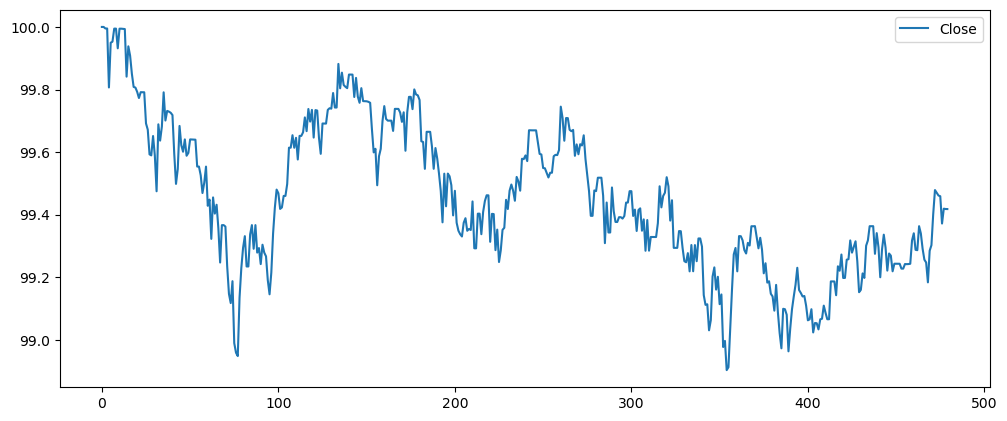

In [37]:
data_0 = df_BBANDS_score[["Montante_total"]]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(df_BBANDS_score.index, data_0)


#Preço
# data_p = pd.DataFrame()
# data_p['Close'] = data['Close']

# line_p = plt.plot(data_p.index, data_p)


plt.legend(line, df_BBANDS_score.columns)
# plt.legend(line_p, data_p.columns)
plt.show()

In [38]:
df_BBANDS_score[df_BBANDS_score["Ganho [%]"]<0.0].sum()

Close            1613408210000000000.0000000000
Lowerband        1609329418234545920.0000000000
Middleband       1613830658571428608.0000000000
Upperband        1618331898908311040.0000000000
Upper Touch                       30.0000000000
Down Touch                        65.0000000000
Ganho [%]                       -264.5081963920
Montante_total                 47535.4918036080
dtype: float64

In [39]:
df_BBANDS_score[df_BBANDS_score["Ganho [%]"]>0.0].sum()

Close            0.0000000000
Lowerband        0.0000000000
Middleband       0.0000000000
Upperband        0.0000000000
Upper Touch      0.0000000000
Down Touch       0.0000000000
Ganho [%]        0.0000000000
Montante_total   0.0000000000
dtype: float64

In [40]:
df_BBANDS_score.tail()

,Close,Lowerband,Middleband,Upperband,Upper Touch,Down Touch,Ganho [%],Montante_total
475,3376800000000000.0000000000,3357427463157187.0000000000,3367326190476190.5000000000,3377224917795194.0000000000,0.0000000000,0.0000000000,-0.5408757673,99.4591242327
476,3371010000000000.0000000000,3357990977339203.0000000000,3367756666666666.5000000000,3377522355994130.0000000000,0.0000000000,0.0000000000,-0.6280691562,99.3719308438
477,3374160000000000.0000000000,3358571095030893.5000000000,3368338095238095.0000000000,3378105095445296.5000000000,0.0000000000,0.0000000000,-0.5806323384,99.4193676616
478,3374090000000000.0000000000,3359250669753408.5000000000,3368915238095238.0000000000,3378579806437067.5000000000,0.0000000000,0.0000000000,-0.5816864899,99.4183135101
479,3374080000000000.0000000000,3360023359826549.0000000000,3369489047619047.5000000000,3378954735411546.0000000000,0.0000000000,0.0000000000,-0.5818370830,99.4181629170


In [ ]:
Methodo MACD

In [42]:
macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

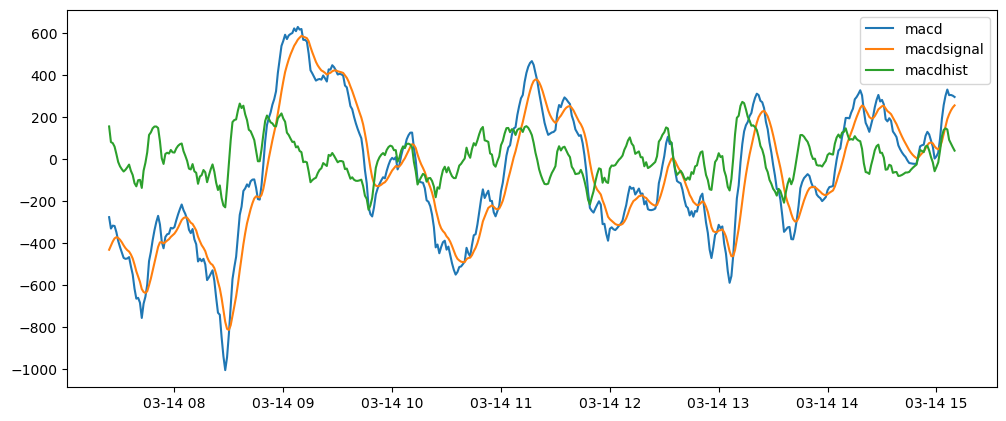

In [43]:
#Bordas de Boillinger
data_MACD = pd.DataFrame({"macd": macd, "macdsignal":macdsignal, "macdhist":macdhist})

data_MACD0 = data_MACD[["macd", "macdsignal", "macdhist"]]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_MACD0)

data_p = pd.DataFrame()
data_p['Close'] = data['Close']
plt.legend(line, data_MACD0.columns)
plt.show()